# Implement Gradient Descent For Neural Network (or Logistic Regression)
#### Predicting if a person have heart disease or not  using logistic regression
Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person have disease or he/she doesn't).

DataSource: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inlin e
import seaborn as sns
from tensorflow.keras import layers

In [2]:
df = pd.read_csv('F:\AAA Machine Learning\Kaggle\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Train Test Spit

In [3]:
from sklearn.model_selection import train_test_split
y = df['target']
X = df.drop(['target'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
# Create a custom early stoppinng callback that stops training the model after the accuracy is 100%
# The custom callback inherits from tensorflow.keras.callbacks.Callback

class MyThresholdCallback(keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        accuracy = logs["val_binary_accuracy"]
        if accuracy >= self.threshold:
            self.model.stop_training = True
            
            
early_stopping = MyThresholdCallback(threshold=1.0)

In [8]:
# Create the model with 4 dense layers (dense layers contain our neurons)
# The model uses BatchNormilzation() in order to scale our data in the range: [0, 1]
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu', input_shape=[X.shape[1]]),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

# Compile the model using adam
# Measure our loss with binary_crossentropy
# Set metrics to binary_accuracy, which lets us know how accurate the model is
# Keep in mind that the accuracy lies on a scale of [0.0, 1.0],
# In order to convert this accuracy to percentage, move the decimal point to the right twice (acc*100)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

# Finally fit the model, training it with X_train and y_train, and validating it with X_test and y_test
# Use 25 data points per epoch (the amount of epochs is the amount of times we feed the model data)
# Use the custom callback defined earlier that stops the model at 100% accuracy
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=500,
    callbacks=[early_stopping]
)

Epoch 1/500
26/26 [==============================] - 2s 25ms/step - loss: 0.4629 - binary_accuracy: 0.8402 - val_loss: 0.8816 - val_binary_accuracy: 0.5073
Epoch 2/500
26/26 [==============================] - 0s 17ms/step - loss: 0.1704 - binary_accuracy: 0.9415 - val_loss: 0.5178 - val_binary_accuracy: 0.8049
Epoch 3/500
26/26 [==============================] - 0s 17ms/step - loss: 0.1080 - binary_accuracy: 0.9610 - val_loss: 0.6879 - val_binary_accuracy: 0.5415
Epoch 4/500
26/26 [==============================] - 0s 14ms/step - loss: 0.1181 - binary_accuracy: 0.9512 - val_loss: 0.5311 - val_binary_accuracy: 0.6878
Epoch 5/500
26/26 [==============================] - 0s 14ms/step - loss: 0.0771 - binary_accuracy: 0.9707 - val_loss: 0.5198 - val_binary_accuracy: 0.7268
Epoch 6/500
26/26 [==============================] - 0s 14ms/step - loss: 0.0715 - binary_accuracy: 0.9732 - val_loss: 0.4863 - val_binary_accuracy: 0.7463
Epoch 7/500
26/26 [==============================] - 0s 15ms/ste

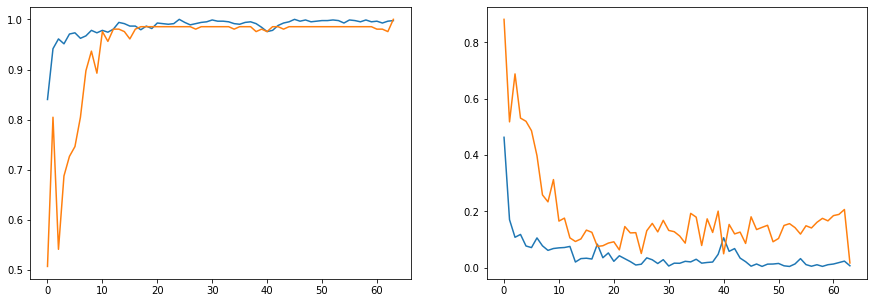

In [9]:
# Now plot our increase/decrease in percentage and loss
# The left graph represents percent, and the right graph represents loss
# Keep in mind, we're looking for a high percent and a low loss
history_df = pd.DataFrame(history.history)

f, (ax1, ax2) = plt.subplots(1, 2)
f.figure.set_figheight(5)
f.figure.set_figwidth(15)

ax1.plot(history_df.index, history_df['binary_accuracy'])
ax1.plot(history_df.index, history_df['val_binary_accuracy'])

ax2.plot(history_df.index, history_df['loss'])
ax2.plot(history_df.index, history_df['val_loss'])

In [1]:
coef,intercepts = model.get_weights()
coef,intercepts

NameError: name 'model' is not defined